<center><b><h1>  The Project
<center><b> Play Store Reviews

**First Week:**

Dataset: https://drive.google.com/drive/folders/1FYv3LS827CiclAZUjlYBobuzKmOe6Grp

**Tasks (Individually): **
* Clean and prepare the dataset for analyzing 
* Plot top 3 installed application using any type of plotting charts

**Extra Information:**
* Data Cleaning article: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/ https://monkeylearn.com/blogdata-cleaning-techniques/
* More Data Cleaning articles: https://monkeylearn.com/blog/data-cleaning-techniques/
* A data Cleaning Tutorial: https://www.youtube.com/watch?v=IxxGqoOksJ4&ab_channel=DataDaft
GeeksforGeeks
Working with Missing Data in Pandas - GeeksforGeeks
A Computer Science portal for geeks. It contains well written, well thought and well explained computer science and programming articles, quizzes and practice/competitive programming/company interview Questions.

**Working with Missing Data in Pandas** - GeeksforGeeks

https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

A Computer Science portal for geeks. 
It contains well written, well thought and well explained computer science and programming articles, quizzes and practice/competitive programming/company interview Questions.





**8 Effective Data Cleaning Techniques for Better Data** -MonkeyLearn Blog

Learn what data cleaning is and discover effective and straightforward techniques to clean your data. 

Plus, get the tools to analyze qualitative data.

8 Effective Data Cleaning Techniques for Better Data

https://monkeylearn.com/blog/data-cleaning-techniques/

**DataDaft** -YouTube 

***Python for Data Analysis: Exploring and Cleaning Data***

https://www.youtube.com/watch?v=IxxGqoOksJ4

<center>
<h1> The analysis</h1>
<p> The extended version</p>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# read the data
play_store = pd.read_csv('googleplaystore.csv')
user_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [28]:
print('This is a display of the first 3 rows')
display(play_store.head(3))

This is a display of the first 3 rows


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [29]:
print(play_store.info())
# using the info we can see the data type(Dtype) and the non-null values that each column has, AND as a result we know how many missing values each collumn has.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


From the above outputs we can see that the "Reviews", "Size", "Installs", and "Price" columns should be numerical, but they are currently strings. 

So propably we should make the appropriate changes and convert them into the correct data type. 

The "Last Updated"  column maybe should be date data type, but they are currently strings. 

The Rating category has a lot of values missing.

In [30]:
print("The number of rows and columns")
print(play_store.shape)

print("")
print("How many null values there are on the play_store data frame")
print(play_store.isnull().sum().sum())

The number of rows and columns
(10841, 13)

How many null values there are on the play_store data frame
1487


<b> I am checking to see if there were any duplicates in our data frame, and I remove them.

In [31]:
play_store = play_store.drop_duplicates(keep='first')
print("The number of rows and columns after I removed the duplicates")
print(play_store.shape)
display(play_store)


The number of rows and columns after I removed the duplicates
(10358, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [32]:
# perform summary statistics
print(play_store.describe())

            Rating
count  8893.000000
mean      4.189542
std       0.545452
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


<center><h1>  Chech the different data of the columns, clean or replace them when necessary

<center> I will start with the numerical and the should be numerical columns

<center><b>The Installs column

In [33]:
print("Find the unique values of the Installs column")
print(play_store.Installs.sort_values().unique())

Find the unique values of the Installs column
['0' '0+' '1+' '1,000+' '1,000,000+' '1,000,000,000+' '10+' '10,000+'
 '10,000,000+' '100+' '100,000+' '100,000,000+' '5+' '5,000+' '5,000,000+'
 '50+' '50,000+' '50,000,000+' '500+' '500,000+' '500,000,000+' 'Free']


We can see at the above output that the values are not in a consistent format. Some values have a plus sign while others do not. 
We need a consistent format for these values in order to effectively use this data.
We can convert these values to a numerical format, such as integer, and remove any non-numeric characters like the plus signs.
Propably the values '0' and 'Free' are missing vallues, or the '0' it's for zero installs. I am going to live '0' as it is and make changes to the other values. 
Using the code (play_store['Installs'] == 'Free').sum() I can see that there is only ONE value 'Free'. So I am going to replace it with '0'.
Since we don't know the exact numbers, I am rounding the numbers.
After that I will convert the column type from oblect into int64.

In [34]:
#Replace the instances with the correct format
replace_dict = {'0':0, 'Free':0, '10,000+':10000, '500,000+':500000, '5,000,000+':5000000, '50,000,000+':50000000, '1,000,000+':1000000, '10,000,000+':10000000, '5,000+':5000, '100,000,000+':100000000, '1,000,000,000+':1000000000, '1,000+':1000, '500,000,000+':500000000, '50+':50, '100+':100, '500+':500, '10+':10, '1+':1, '5+':5, '0+':0, '100,000+':100000, '50,000+':50000}

# Replace 'Installs' column elements with corresponding dictionary values using lambda.
play_store['Installs'] = play_store['Installs'].replace(replace_dict)

#Convert the 'Installs' column to type int64
play_store['Installs'] = play_store['Installs'].astype('int64')


display(play_store.Installs.sort_values().unique())

array([         0,          1,          5,         10,         50,
              100,        500,       1000,       5000,      10000,
            50000,     100000,     500000,    1000000,    5000000,
         10000000,   50000000,  100000000,  500000000, 1000000000],
      dtype=int64)

Perform summary statistics after cleaning the Installs column

In [35]:
display(play_store.describe())

,Rating,Installs
count,8893.000000,1.035800e+04
mean,4.189542,1.415639e+07
std,0.545452,8.023580e+07
min,1.000000,0.000000e+00
25%,4.000000,1.000000e+03
50%,4.300000,1.000000e+05
75%,4.500000,1.000000e+06
max,19.000000,1.000000e+09


<center><b>The Price column

In [36]:
print("Find the unique values of the Price column")
print(play_store.Price.sort_values().unique())


Find the unique values of the Price column
['$0.99' '$1.00' '$1.04' '$1.20' '$1.26' '$1.29' '$1.49' '$1.50' '$1.59'
 '$1.61' '$1.70' '$1.75' '$1.76' '$1.96' '$1.97' '$1.99' '$10.00' '$10.99'
 '$109.99' '$11.99' '$12.99' '$13.99' '$14.00' '$14.99' '$15.46' '$15.99'
 '$154.99' '$16.99' '$17.99' '$18.99' '$19.40' '$19.90' '$19.99' '$2.00'
 '$2.49' '$2.50' '$2.56' '$2.59' '$2.60' '$2.90' '$2.95' '$2.99' '$200.00'
 '$24.99' '$25.99' '$28.99' '$29.99' '$299.99' '$3.02' '$3.04' '$3.08'
 '$3.28' '$3.49' '$3.61' '$3.88' '$3.90' '$3.95' '$3.99' '$30.99' '$33.99'
 '$37.99' '$379.99' '$389.99' '$39.99' '$394.99' '$399.99' '$4.29' '$4.49'
 '$4.59' '$4.60' '$4.77' '$4.80' '$4.84' '$4.85' '$4.99' '$400.00'
 '$46.99' '$5.00' '$5.49' '$5.99' '$6.49' '$6.99' '$7.49' '$7.99' '$74.99'
 '$79.99' '$8.49' '$8.99' '$89.99' '$9.00' '$9.99' '0' 'Everyone']


We can see at the above output that the values are not in a consistent format. Some values have a dollar sign while others do not. 
We can convert these values to a numerical format, such as float, and remove any non-numeric characters like the dollar signs.
Propably the values '0' and 'Everyone' are missing vallues, or the '0' it's for free price. I am going to live '0' as it is and make changes to the other values. 
Using the code (play_store['Price'] == 'Everyone').sum() I can see that there is only one value 'Everyone'. By using the play_store.Price.value_counts(), we can see that the 0 apeers most in our DataFame,  so I am going to replace the 'Everyone' with '0'.

In [37]:
# First, replace all dollar signs with empty strings. ERROR
play_store['Price'] = play_store['Price'].str.replace('$','')

C:\Users\Christos\AppData\Local\Temp\ipykernel_17752\4138016179.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store['Price'] = play_store['Price'].str.replace('$','')


In [38]:
# First, replace all dollar signs with empty strings
play_store['Price'] = play_store['Price'].str.replace('$','',regex=True)

In [39]:
# Second, replace the 'Everyone' with '0'
play_store['Price'] = play_store['Price'].str.replace('Everyone','0')
# Third, change the data type to float
play_store['Price'] = play_store['Price'].astype(float)

In [40]:
print("Find the unique values of the Price column, after the cleaning")
print("")
print(play_store.Price.sort_values().unique())

Find the unique values of the Price column, after the cleaning

[  0.     0.99   1.     1.04   1.2    1.26   1.29   1.49   1.5    1.59
   1.61   1.7    1.75   1.76   1.96   1.97   1.99   2.     2.49   2.5
   2.56   2.59   2.6    2.9    2.95   2.99   3.02   3.04   3.08   3.28
   3.49   3.61   3.88   3.9    3.95   3.99   4.29   4.49   4.59   4.6
   4.77   4.8    4.84   4.85   4.99   5.     5.49   5.99   6.49   6.99
   7.49   7.99   8.49   8.99   9.     9.99  10.    10.99  11.99  12.99
  13.99  14.    14.99  15.46  15.99  16.99  17.99  18.99  19.4   19.9
  19.99  24.99  25.99  28.99  29.99  30.99  33.99  37.99  39.99  46.99
  74.99  79.99  89.99 109.99 154.99 200.   299.99 379.99 389.99 394.99
 399.99 400.  ]


In [41]:
# perform summary statistics after cleaning the Installs and the Price column
display(play_store.describe())

,Rating,Installs,Price
count,8893.000000,1.035800e+04,10358.000000
mean,4.189542,1.415639e+07,1.030701
std,0.545452,8.023580e+07,16.277843
min,1.000000,0.000000e+00,0.000000
25%,4.000000,1.000000e+03,0.000000
50%,4.300000,1.000000e+05,0.000000
75%,4.500000,1.000000e+06,0.000000
max,19.000000,1.000000e+09,400.000000


<center><b>The Rating column

In [42]:
print("The unique values of the Rating column")
print(play_store.Rating.sort_values().unique())

The unique values of the Rating column
[ 1.   1.2  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.  19.   nan]


We can see at the above output that the values are not in a consistent format. Some values have a dollar sign while others do not. 
We can convert these values to a numerical format, such as float, and remove any non-numeric characters like the dollar signs.
Propably the values '0' and 'Everyone' are missing vallues, or the '0' it's for free price. I am going to live '0' as it is and make changes to the other values. 
Using the code print(play_store.Rating.isnull().sum()) I can see that there are 1464 null values. Because there are a lot and I don't want to remove/delete them I will replave the null values with the mean of the Rating column.

In [45]:
# print(play_store.Rating.value_counts())
# Replaced the null values with the mean value.
mean_rating = play_store['Rating'].mean()
play_store['Rating'] = play_store['Rating'].fillna(mean_rating)

# Replace instances with the correct values.
play_store['Rating'] = play_store['Rating'].replace(19., 1.9)


In [47]:
print("The unique values of the Rating column after the cleaning, are")
print(play_store.Rating.sort_values().unique())

The unique values of the Rating column after the cleaning, are
[1.         1.2        1.4        1.5        1.6        1.7
 1.8        1.9        2.         2.1        2.2        2.3
 2.4        2.5        2.6        2.7        2.8        2.9
 3.         3.1        3.2        3.3        3.4        3.5
 3.6        3.7        3.8        3.9        4.         4.1
 4.18954234 4.2        4.3        4.4        4.5        4.6
 4.7        4.8        4.9        5.        ]


In [48]:
# perform summary statistics after cleaning the Installs, the Price and the Rating  column
display(play_store.describe())

,Rating,Installs,Price
count,10358.000000,1.035800e+04,10358.000000
mean,4.187891,1.415639e+07,1.030701
std,0.484519,8.023580e+07,16.277843
min,1.000000,0.000000e+00,0.000000
25%,4.100000,1.000000e+03,0.000000
50%,4.200000,1.000000e+05,0.000000
75%,4.500000,1.000000e+06,0.000000
max,5.000000,1.000000e+09,400.000000


<center><B>The Reviews column

As we saw at the beginig, the Reviews column has object as it's data type, and we should convert it into int, so that we can perform analysis on it.
Using the print(play_store.Reviews.sort_values().unique()) we can see that most of the values are in the same format, except one that we found it through an error.
We found the 3.0M because there was as an error when we tried to change the data type. So we will replace the 3.0M with 3000000 and after that convert the data type to integer.

In [49]:
print("These are the unique values of the Reviews column before the convertion")
print(play_store.Reviews.sort_values().unique())

#replace the instances with the correct values
play_store['Reviews'] = play_store['Reviews'].replace('3.0M', 3000000)

#convert the values of the Reviews column into integers
play_store["Reviews"] = play_store["Reviews"].astype(int)

print("These are the unique values of the Reviews column after the replaces and the change of type")
print(play_store.Reviews.sort_values().unique())

#reviews = play_store["Total_Reviews"]
#reviews_set = set(reviews)
#print(reviews_set)
#print(len(reviews_set))

These are the unique values of the Reviews column before the convertion
['0' '1' '10' ... '9975' '999' '9992']
These are the unique values of the Reviews column after the replaces and the change of type
[       0        1        2 ... 69119316 78128208 78158306]


In [50]:
# perform summary statistics after cleaning the Installs, the Price, the Rating and the Reviews column
print(play_store.describe())

             Rating       Reviews      Installs         Price
count  10358.000000  1.035800e+04  1.035800e+04  10358.000000
mean       4.187891  4.061551e+05  1.415639e+07      1.030701
std        0.484519  2.696768e+06  8.023580e+07     16.277843
min        1.000000  0.000000e+00  0.000000e+00      0.000000
25%        4.100000  3.200000e+01  1.000000e+03      0.000000
50%        4.200000  1.683000e+03  1.000000e+05      0.000000
75%        4.500000  4.648275e+04  1.000000e+06      0.000000
max        5.000000  7.815831e+07  1.000000e+09    400.000000


<center><B>The Type column

In [51]:
# the number of unique values
print(play_store.Type.value_counts())

Free    9591
Paid     765
0          1
Name: Type, dtype: int64


In [52]:
#Replace instances.
play_store['Type'] = play_store['Type'].replace("0", "Free")

In [53]:
# the number of unique values
print(play_store.Type.value_counts())

Free    9592
Paid     765
Name: Type, dtype: int64


<center><B>The Size column

needs more work!!

In [44]:
print("The total null values in the Size column is, ")
print(play_store.Size.isnull().sum())

print("The first 15 unique values in the Size column, before the cleaning are, ")
print(play_store.Size.sort_values().unique()[:15])

The total null values in the Size column is, 
0
The first 15 unique values in the Size column, before the cleaning are, 
['1,000+' '1.0M' '1.1M' '1.2M' '1.3M' '1.4M' '1.5M' '1.6M' '1.7M' '1.8M'
 '1.9M' '10.0M' '100M' '1020k' '103k']


<b>
Question -> 
How can I handle inconsistent formatting like that?

Answer->
Maybe using the:

import regex as re
re.replace(r'd', 'o' , 'Hello W0rld')

import regex as re
re.sub(r'\d', 'o' , 'Hello W0rld')

In [45]:
#The value "Varies with device" does not give any useful information about the size of the app and it's better to remove or replace it with a default value.
play_store['Size'] = play_store['Size'].replace('Varies with device', 'NaN')

In [46]:
# Convert the 'Size' column to type integer
# play_store['Size'] = play_store['Size'].astype('int64')
# how can i convert the different non numerical values into the correvt numerical?

<center><b>The Last Updated column

needs more work!!

In [48]:
print("Find the unique values of the Last Updated column")

print(sorted(play_store['Last Updated'].sort_values().unique())[:20])


Find the unique values of the Last Updated column
['1.0.19', 'April 1, 2016', 'April 1, 2017', 'April 1, 2018', 'April 10, 2013', 'April 10, 2014', 'April 10, 2015', 'April 10, 2016', 'April 10, 2017', 'April 10, 2018', 'April 11, 2011', 'April 11, 2014', 'April 11, 2016', 'April 11, 2017', 'April 11, 2018', 'April 12, 2016', 'April 12, 2017', 'April 12, 2018', 'April 13, 2014', 'April 13, 2016']


In [67]:
#hint, not the solution

l = ['April 1, 2016', 'April 1, 2017', 'April 1, 2018', 'April 10, 2013', 'April 10, 2014', 'April 10, 2015', 'April 10, 2016', 'April 10, 2017', 'April 10, 2018', 'April 11, 2011', 'April 11, 2014', 'April 11, 2016', 'April 11, 2017', 'April 11, 2018', 'April 12, 2016']
l_2 = []
for n in l:
    l_2.append(n + str(1))

print(l_2)


['April 1, 20161', 'April 1, 20171', 'April 1, 20181', 'April 10, 20131', 'April 10, 20141', 'April 10, 20151', 'April 10, 20161', 'April 10, 20171', 'April 10, 20181', 'April 11, 20111', 'April 11, 20141', 'April 11, 20161', 'April 11, 20171', 'April 11, 20181', 'April 12, 20161']


In [68]:
#hint, not the solution

list(map(lambda element: element + 1, [1,2,3]))

[2, 3, 4]

<center><b><h1> Find the top 3 Apps based on their installations

In [54]:
print('1st way to find the top 3')
top_3_apps1 = play_store.nlargest(3, 'Installs')
display(top_3_apps1)

print('2nd way to find the top 3')
top_3_apps2 = play_store.sort_values('Installs', ascending=False).head(3)
display(top_3_apps2)

1st way to find the top 3


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


2nd way to find the top 3


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
4098,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
4150,Google,TOOLS,4.4,8021623,Varies with device,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


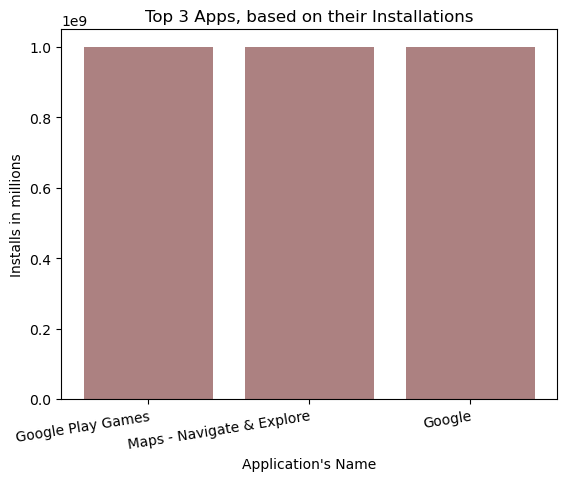

In [56]:
installs = top_3_apps2['Installs']
app_names = top_3_apps2['App']

plt.bar(app_names, installs, color='#ac8181')


# Add labels to the x and y axes
plt.xlabel('Application\'s Name')
plt.ylabel('Installs in millions')

plt.title('Top 3 Apps, based on their Installations')

plt.xticks(rotation=9,  ha='right', rotation_mode='anchor')

plt.show()





The above chart displays the top 3 apps based on their number of installations in millions. On the x-axis, we have the names of the 3 apps and on the y-axis, we have the number of installations in millions. As seen from the chart, all 3 apps have exceeded the 1 million installations. 